In [5]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

In [6]:
print(tf.__version__)

2.20.0


In [7]:
data = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_labels[0])

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 64s 2us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 15s 3us/step
9


In [9]:
print(train_labels[0])
print(class_names[train_labels[0]])

9
Ankle boot


In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])


c:\Users\SHRAVAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9258 - loss: 0.1995
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9273 - loss: 0.1938
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9316 - loss: 0.1852
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9323 - loss: 0.1817
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9301 - loss: 0.1822


In [17]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8836 - loss: 0.3756


[0.37778621912002563, 0.8828999996185303]

In [19]:
prediction = model.predict(test_images)
print(class_names[np.argmax(prediction[0])])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Ankle boot


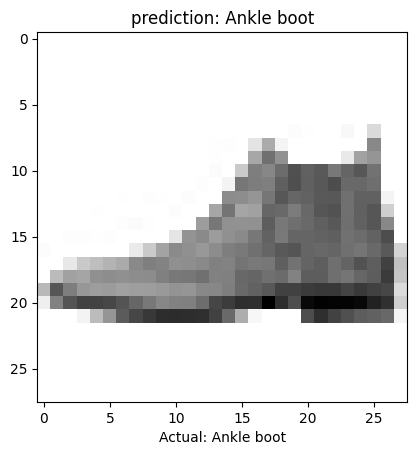

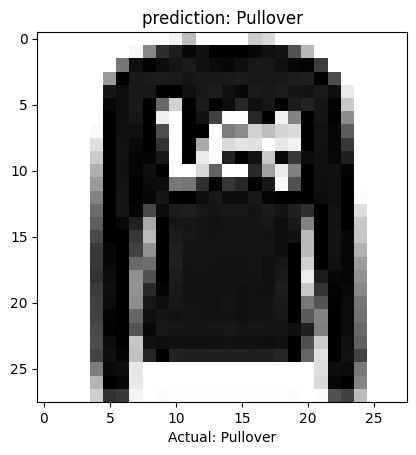

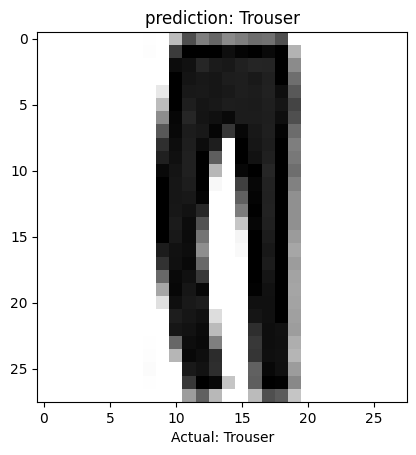

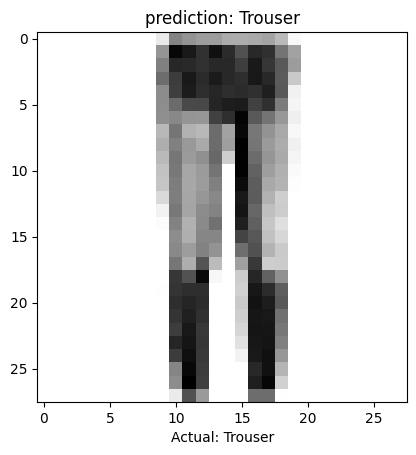

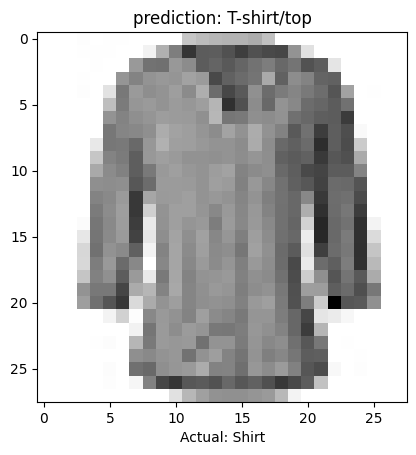

In [22]:
for i  in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("prediction: " + class_names[np.argmax(prediction[i])])
    plt.show()